In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 


# CapStone II Project

In [2]:
#The downlaod and read the raw data 
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [3]:
#check the number of rows and columns
df.shape

(423857, 25)

In [4]:
#See the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [5]:
df['model'].value_counts().head(10)

f-150             6073
silverado 1500    3878
escape            3208
camry             2906
1500              2898
accord            2813
altima            2592
explorer          2481
civic             2472
silverado         2321
Name: model, dtype: int64

In [ ]:
# From frequency summary each model have enough sample size represent the dataset thus,
# there is no inbalance problem

In [14]:
#The number of model in used car dataset
df['model'].value_counts()


f-150                           6073
silverado 1500                  3878
escape                          3208
camry                           2906
1500                            2898
                                ... 
gsxr 750                           1
International Harvestor s150       1
M931A2                             1
murano awd sv                      1
accord sdn lx-p                    1
Name: model, Length: 27042, dtype: int64

In [11]:
#The type and the number of car manufacturer companies
df['manufacturer']
#df['size'].unique()

0                gmc
1            hyundai
2             toyota
3         mitsubishi
4                gmc
             ...    
423852       hyundai
423853        toyota
423854          ford
423855       lincoln
423856        nissan
Name: manufacturer, Length: 423857, dtype: object

In [16]:
#copey original dataframe   
df1 = df.copy()

In [17]:
#The type of variables or features
df1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [18]:
# Sub grouping the variable to be dropped 


df1 = df1.drop(['id', 'url', 'region', 'region_url', 'vin','image_url', 'description', 'county', 'state', 'lat', 'long'], axis = 1)
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white


In [19]:
#check the dimension - dimension reduced from 25 to 12 features using subset drop method
df1.shape

(423857, 14)

In [20]:
# change dtype for price from integer to floating
df1.price = df1.price.astype('float')
df1.price.dtype

dtype('float64')

In [21]:
#change make year from float to data time
df1.year = pd.to_datetime(df1['year'], format = '%y%m%d', errors = 'coerce')
df1.year.dtype

dtype('<M8[ns]')

In [22]:
df1.info()
# dtype of  year is changed into datetime, and price to float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         423857 non-null  float64       
 1   year          212986 non-null  datetime64[ns]
 2   manufacturer  313242 non-null  object        
 3   model         325384 non-null  object        
 4   condition     176719 non-null  object        
 5   cylinders     197679 non-null  object        
 6   fuel          327214 non-null  object        
 7   odometer      270585 non-null  float64       
 8   title_status  327759 non-null  object        
 9   transmission  328065 non-null  object        
 10  drive         231119 non-null  object        
 11  size          102627 non-null  object        
 12  type          241157 non-null  object        
 13  paint_color   222203 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 45.3+ MB


In [80]:
#Check the number of null values of the dataframe
#df1.dropna(axis = 0, how = 'any', inplace = True)
#df1

In [23]:
# Find missing values count and percentage 

missing = pd.DataFrame(df1.isnull().sum())
missing.columns = ['count']
missing['%'] = ( missing['count'] /len(df1)) *100
missing.sort_values(by='count', ascending=False).head(15)

,count,%
size,321230,75.787353
condition,247138,58.306929
cylinders,226178,53.361865
year,210871,49.750505
paint_color,201654,47.575951
drive,192738,45.472412
type,182700,43.104160
odometer,153272,36.161252
manufacturer,110615,26.097245
model,98473,23.232600


In [24]:
#check the shape of skewness
print(df1['price'].skew())
df1['price'].describe()

286.6653149470297


count    4.238570e+05
mean     5.779437e+04
std      1.002581e+07
min      0.000000e+00
25%      4.499000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

In [ ]:
#positive skew 286.66 means the distribution is skewed extermely to the right
# minimum price of used car is zero at lower limit outliers tells no price value is recorded
# maximum price is used car is over 380 Million dollar This is also high leverage outliers. 
# both the mean and midian illustrate the impact of outliers. if there is a big difference between mean and 
# median or if mean is much greater than median then the dataset influenced by the extreme outliers. Thus, assess 
# extreme values and evaluating them  appropriate  based on the real circumstance limit the tendency
# outlier influence.

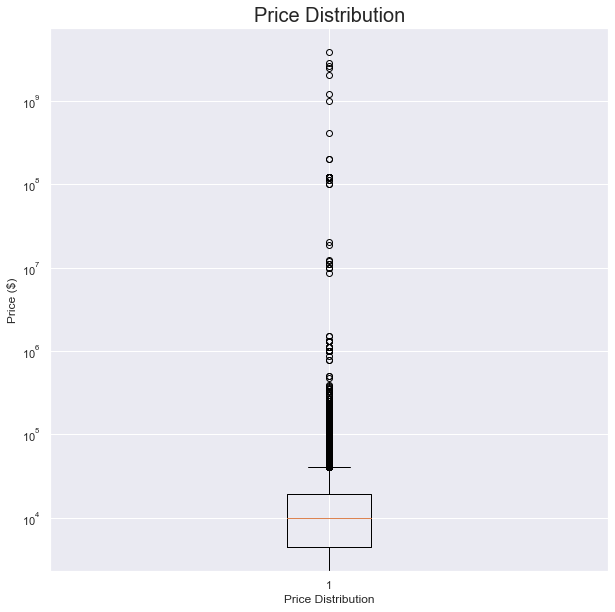

In [26]:
# box plot for the price
sn.set()
plt.figure(figsize = (10,10))
plt.boxplot(df1['price'])
plt.xlabel('Price Distribution')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.title('Price Distribution', size = 20)
plt.show()

In [192]:
# From histograph plot There are  extremely autliers thus the feature need attention in
# trimming the exterme  data points.

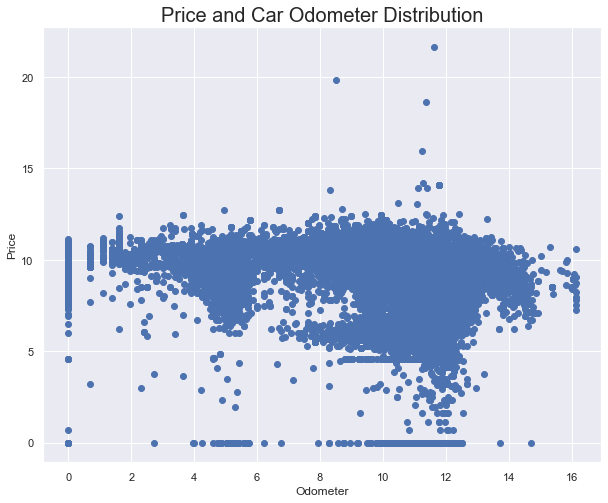

In [29]:
#scatterplot for price and Make year distribution
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(np.log(df1['odometer']), np.log(df1['price']), marker = 'o')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price and Car Odometer Distribution', size = 20)
plt.show()

In [194]:
#The scatter plot illustrated there is zero price , and few high leverage outliers in price, 

In [30]:
#Filter used cars Price above hunderd thousands considered as outlier
index = df1[(df1['price'] > 100000) | (df1['price'] < 750)].index
df1.drop(index, inplace = True)
df1['price'].describe()

count    376494.000000
mean      15345.177562
std       12823.165385
min         750.000000
25%        5999.000000
50%       11950.000000
75%       19999.000000
max      100000.000000
Name: price, dtype: float64

In [ ]:
# We can easily understand the price value for some cars beyond the range of car price or it is 
# exterme therefore dropping such values enhance the accuracy of prediction.

In [23]:
# Check the minimum used cars price
# df1['price'] = df1[df1['price'] > 750]
# price_below_limit.sort_values(by = 'price', ascending = True).head(5)
# assert df1['price'].min() > 750

In [32]:
#Filter Odometer range above 300000 and range belwo 10000
index = df1[(df1['odometer'] > 300000) | (df1['odometer'] < 10000)].index
df1.drop(index, inplace = True)
df1['odometer'].describe()

count    230777.000000
mean     101796.347643
std       58191.121225
min       10000.000000
25%       53188.000000
50%       97023.000000
75%      141000.000000
max      300000.000000
Name: odometer, dtype: float64

There are price values which has zero or below $750  value should be removed, for they inhibit the prediction accuracy

In [20]:
# few cars odometers values is extremely large stem from either typo error 
# or data collection error, such  extreme values result to poor prediction accuracy and should drop the
# values from the dataset.

 Odometer above 300K is considered as extreme value and need to drop the outliers from the dataset

In [25]:
#Trimming the outliers from Price
#index = df1[(df1['price'] > 100000) | (df1['price'] < 750)].index
#df1.drop(index, inplace = True)
#df1['price'].describe()

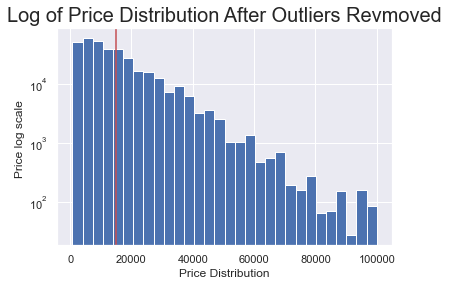

In [35]:
# After removing the exterme values from price series, the box plot shows there is still extreme values 
# far beyond the interquartile range.
sn.set()
plt.hist(df1['price'], bins =30)
plt.xlabel('Price Distribution')
plt.ylabel('Price log scale Frequency')
plt.yscale('log')
plt.axvline(df1['price'].mean(), color = 'r')
plt.title('Log of Price Distribution After Outliers Revmoved', size = 20)
plt.show()

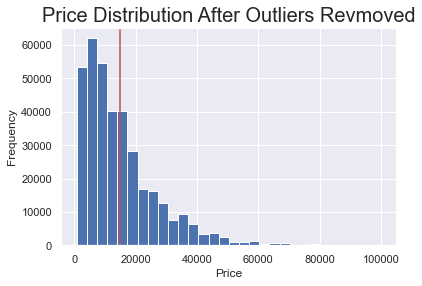

In [36]:
sn.set()
plt.hist(df1['price'], bins =30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(df1['price'].mean(), color = 'r')
plt.title('Price Distribution After Outliers Revmoved', size = 20)
plt.show()

In [ ]:
# The above two histograph plots show the difference in log scale. log scale shows the real distribution
# than unscaled one, thus having clear visualization support the appraoch for data preparation or preprocessing 
# phase.
# Although siginficant improvement  has shown after removing too extreme outliers but still there is 
# extreme outlier is obsereved. The histogram postitive skewness.

In [37]:

#Trimming the outliers from Price
index = df1[(df1['odometer'] > 300000) | (df1['odometer'] < 10000)].index
df1.drop(index, inplace = True)
df1['odometer'].describe()

count    230777.000000
mean     101796.347643
std       58191.121225
min       10000.000000
25%       53188.000000
50%       97023.000000
75%      141000.000000
max      300000.000000
Name: odometer, dtype: float64

In [ ]:
#From the summary of describe(), the mean of Odometer and Median distribution is very close to each others,
# unlike the 25% from the mean, 75% far skewed to right like wise the max values.

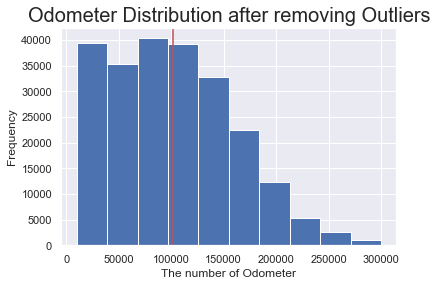

In [39]:
# histogram for 'odometer' Distirbution
plt.hist(df1['odometer'], bins = 10)
plt.xlabel('The number of Odometer')
plt.ylabel('Frequency')
plt.axvline(df1['odometer'].mean(), color = 'r')
plt.title('Odometer Distribution after removing Outliers', size = 20)
plt.show()

In [24]:
# Odometer histogram plot skewed to the right

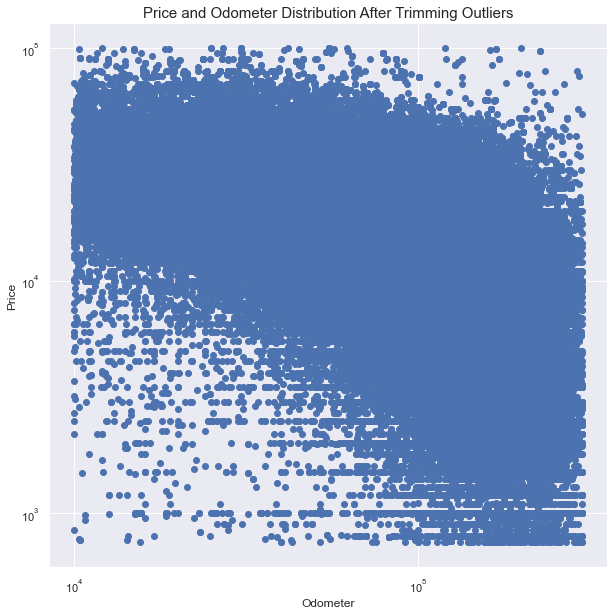

In [40]:
#scatterplot for price and Make year distribution
fig, ax = plt.subplots(figsize = (10, 10))

plt.scatter(df1['odometer'], df1['price'], marker = 'o')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.xscale('log')
plt.yscale('log')
plt.title('Price and Odometer Distribution After Trimming Outliers', size = 15)
plt.show()

In [ ]:
#The scatter plot shows that the association between price and odometer is weak negative corrlation.

# Explanatory Data Analysis

In [43]:
# check the dataframe missing value afer forward filling
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363627 entries, 0 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         363627 non-null  float64       
 1   year          177366 non-null  datetime64[ns]
 2   manufacturer  267575 non-null  object        
 3   model         276694 non-null  object        
 4   condition     156149 non-null  object        
 5   cylinders     172182 non-null  object        
 6   fuel          278142 non-null  object        
 7   odometer      230777 non-null  float64       
 8   title_status  278603 non-null  object        
 9   transmission  279057 non-null  object        
 10  drive         198075 non-null  object        
 11  size          88793 non-null   object        
 12  type          204347 non-null  object        
 13  paint_color   193066 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 51.6+ MB


In [111]:
#df1.dropna(subset = ['year'], axis = 1).info()

In [124]:
#df1[df1['year'].isnull() == False].info()

In [44]:
df1.dropna(axis = 0, how = 'any', inplace = True)


In [45]:
df2 = df1.copy()

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30524 entries, 5 to 423849
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         30524 non-null  float64       
 1   year          30524 non-null  datetime64[ns]
 2   manufacturer  30524 non-null  object        
 3   model         30524 non-null  object        
 4   condition     30524 non-null  object        
 5   cylinders     30524 non-null  object        
 6   fuel          30524 non-null  object        
 7   odometer      30524 non-null  float64       
 8   title_status  30524 non-null  object        
 9   transmission  30524 non-null  object        
 10  drive         30524 non-null  object        
 11  size          30524 non-null  object        
 12  type          30524 non-null  object        
 13  paint_color   30524 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 3.5+ MB


In [47]:
df2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [48]:
pd.get_dummies(df2, columns=['size', 'model', 'drive','cylinders','condition', 'fuel',
        'title_status', 'transmission', 'size', 'type',
       'paint_color']).head()


,price,year,manufacturer,odometer,size_compact,size_full-size,size_mid-size,size_sub-compact,model_- g37x,model_- grand prix,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
5,13995.0,2020-01-02,ford,188406.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,8995.0,2020-01-01,chevrolet,178054.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,10995.0,2020-01-04,ford,170259.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,10995.0,2020-01-01,chevrolet,210865.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,12450.0,2020-01-01,chevrolet,150959.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Check the number of features
df2.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')

In [52]:
#Check the length of dataframe
len(df2)

30524

In [53]:
#View the dataFrame
df2.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
5,13995.0,2020-01-02,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,4wd,full-size,truck,grey
7,8995.0,2020-01-01,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white
8,10995.0,2020-01-04,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white
10,10995.0,2020-01-01,chevrolet,silverado 1500,good,8 cylinders,gas,210865.0,clean,automatic,4wd,full-size,truck,silver
11,12450.0,2020-01-01,chevrolet,silverado 1500,good,8 cylinders,gas,150959.0,clean,automatic,4wd,full-size,truck,blue


In [54]:
df2['size'].unique()

array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

In [ ]:
plt.hist(df2['manufacturer'])

In [260]:
#size_type = {full-size':1, 'mid-size':2, 'compact':3, 'sub-compact':4}}
#df2['size'] = df2['size'].replace(size_type)
#Remove the missing value detected in 'size' and 'type ' freatures
#df1 = df1.fillna(method = 'ffill')
#df1.isnull().sum()
#df1[df1['year'].apply(lambda x: x == x)].info()

In [94]:
# The condition catergories after removing null values 
df1['condition'].unique()

array(['good', 'fair', 'excellent', 'like new', 'new', 'salvage'],
      dtype=object)

In [217]:
#Map condition type catergories 
#condition_type = {'excellent':5, 'good': 4,'new':6, 'like new':2, 'salvage':1, 'fiar':3}
#df1['condition'] = df1['condition'].map(condition_type)
#df1.head()
#df1['condition'].isna().sum()

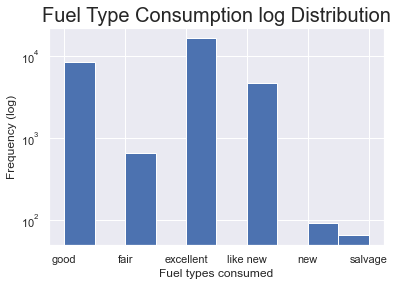

In [191]:
sn.set()
_= plt.hist(df2['condition'])
_= plt.xlabel('Fuel types consumed')
_= plt.ylabel('Frequency (log)')
_= plt.yscale('log')
_= plt.title('Fuel Type Consumption log Distribution', size = 20)
plt.show()

In [101]:
#cyliners types
#df1['cylinders'].unique()

In [182]:
#cylinders_type =  {'4 cylinders': 4, '8 cylinders': 8, '6 cylinders': 6,'3 cylinders': 3,'12 cylinders' :12,
                  # '10 cylinders': 10}

In [183]:
#df1['cylinders'] =  df1['cylinders'].map(cylinders_type)

In [102]:
#df1['fuel'].unique()


In [192]:
#fuel_type = {'gas':5,  'diesel':3, 'other':1, 'electric': 4, 'hybrid':2}
#df1['fuel'] = df1['fuel'].map(fuel_type)
#df1.head()

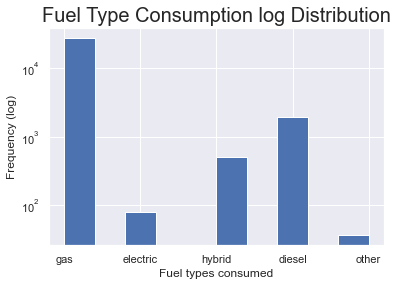

In [108]:
# Histogram plot of fuel type and its distribution
sn.set()
_= plt.hist(df2['fuel'])
_= plt.xlabel('Fuel types consumed')
_= plt.ylabel('Frequency (log)')
_= plt.yscale('log')
_= plt.title('Fuel Type Consumption log Distribution', size = 20)
plt.show()

In [49]:
# Histogram plot of fuel type, most car use gas and diesel


In [154]:
#df1['title_status'].unique()

array(['clean', 'lien', 'rebuilt', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [155]:
#title_status = {'clean':5, 'lien':3,'rebuilt': 4, 'salvage':2, 'missing':1, 'parts only':0}

In [156]:
#df1['title_status'] = df1['title_status'].map(title_status)

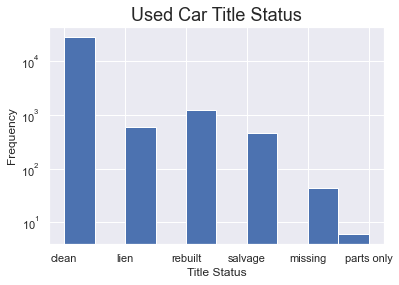

In [109]:
# USED CAR TITLE STATUS : Histogram plot on used cars title status
sn.set()
_=plt.hist(df2['title_status'])
_=plt.xlabel('Title Status')
_=plt.ylabel('Frequency')
_=plt.yscale('log')
_=plt.title('Used Car Title Status', size = 18)
plt.show()

In [ ]:
# Car title histograph shows most cars are Clean 

In [105]:
'''sn.set_theme(style = 'whitegrid')
sn.violinplot(df1['title_status'])
plt.title('Violin Plot Used Car Fuel Consumption ')
plt.show()'''

"sn.set_theme(style = 'whitegrid')\nsn.violinplot(df1['title_status'])\nplt.title('Violin Plot Used Car Fuel Consumption ')\nplt.show()"

In [106]:
#df1['transmission'].unique()

In [160]:
#transmission_type = {'automatic':3, 'manual':2, 'other':4}

In [161]:
#df1['transmission'] = df1['transmission'].map(transmission_type)

In [66]:
# Histogram plot for Transmission type and distribution


In [100]:
#df1['size'].unique()

array([2., 3., 1.])

In [101]:
#df1['size'].unique()

array([2., 3., 1.])

In [95]:
#size_type = {'mid-size':3, 'full-size': 2, 'compact':1}

In [96]:
#df1['size'] = df1['size'].map(size_type)

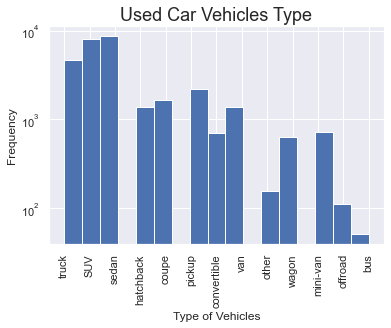

In [127]:
# Used Car types
sn.set()
_=plt.hist(df2['type'], bins = 17)
_=plt.xlabel('Type of Vehicles')
_=plt.ylabel('Frequency')
_=plt.yscale('log')
_=plt.title('Used Car Vehicles Type', size = 18)
_=plt.xticks(rotation = 90)
plt.show()

In [110]:
#df1['type'].unique()

In [52]:
#type_t = {'sedan':12, 'truck':11, 'SUV':10, 'other':9, 'mini-van':8, 'wagon':7, 'hatchback':6,
          'sedan':3, 'truck':2, 'SUV':1,'other': 4,'coupe':5, 'pickup':13, 'convertible':14, 
          'van':15, 'bus':16, 'offroad':17 }

In [169]:
#df1['type'] = df1['type'].map(type_t)

In [158]:
#df1['paint_color'].unique()

In [171]:
#paint_color = {'grey': 8, 'white':7, 'silver':6, 'blue':5, 'brown':4, 'black':3, 'purple':2, 'red':1,
               #'custom':9, 'green':10, 'orange':11, 'yellow':12}

In [172]:
#df1['paint_color'] = df1['paint_color'].map(paint_color)

In [126]:
#df1['manufacturer'].unique()

In [174]:
'''manu_type = {'mitsubishi':1, 'gmc':2, 'ford':3, 'chevrolet':4, 'buick':5, 'toyota':6,
       'jeep':7, 'subaru':8, 'nissan':9, 'hyundai':10, 'dodge':11, 'audi':12, 'rover':13,
       'lexus':14, 'ram':15, 'chrysler':16, 'mini':17, 'pontiac':18, 'mercedes-benz':19,
       'cadillac':20, 'bmw':21, 'kia':22, 'volvo':23, 'volkswagen':24, 'honda':25, 'jaguar':26,
       'acura':27, 'saturn':28, 'mazda':29, 'mercury':30, 'lincoln':31, 'infiniti':32,
       'fiat':33, 'tesla':34, 'ferrari':35, 'harley-davidson':36, 'datsun':37,
       'alfa-romeo':38, 'morgan':39, 'aston-martin':40, 'land rover':41, 'porche':42,
       'hennessey':43}
df1['manufacturer'] = df1['manufacturer'].map(manu_type)'''

In [121]:
df2.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
5,13995.0,2020-01-02,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,4wd,full-size,truck,grey
7,8995.0,2020-01-01,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white
8,10995.0,2020-01-04,ford,explorer,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white
10,10995.0,2020-01-01,chevrolet,silverado 1500,good,8 cylinders,gas,210865.0,clean,automatic,4wd,full-size,truck,silver
11,12450.0,2020-01-01,chevrolet,silverado 1500,good,8 cylinders,gas,150959.0,clean,automatic,4wd,full-size,truck,blue


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30524 entries, 5 to 423849
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         30524 non-null  float64       
 1   year          30524 non-null  datetime64[ns]
 2   manufacturer  30524 non-null  object        
 3   model         30524 non-null  object        
 4   condition     30524 non-null  object        
 5   cylinders     30524 non-null  object        
 6   fuel          30524 non-null  object        
 7   odometer      30524 non-null  float64       
 8   title_status  30524 non-null  object        
 9   transmission  30524 non-null  object        
 10  drive         30524 non-null  object        
 11  size          30524 non-null  object        
 12  type          30524 non-null  object        
 13  paint_color   30524 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 3.5+ MB


In [176]:
#df3 = df1.copy()

In [123]:
#df3.info()

In [183]:
#df3.dropna(axis = 1, how = "any").info()

In [56]:
df2.notna().sum()

price           30524
year            30524
manufacturer    30524
model           30524
condition       30524
cylinders       30524
fuel            30524
odometer        30524
title_status    30524
transmission    30524
drive           30524
size            30524
type            30524
paint_color     30524
dtype: int64

Null Hypothesis: There is no significant relation between price and odometer of a car
Alt-Hypothesis: There is a significant relation between price and odometer.


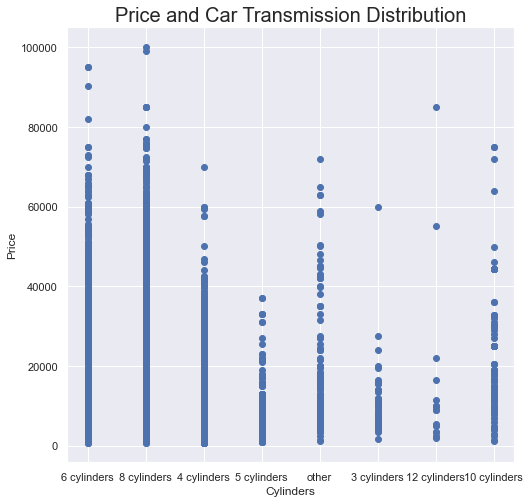

In [64]:
#scatterplot for price and Make year distribution
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(df2['cylinders'],df2.price, marker = 'o')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.title('Price and Car Transmission Distribution', size = 20)
plt.show()

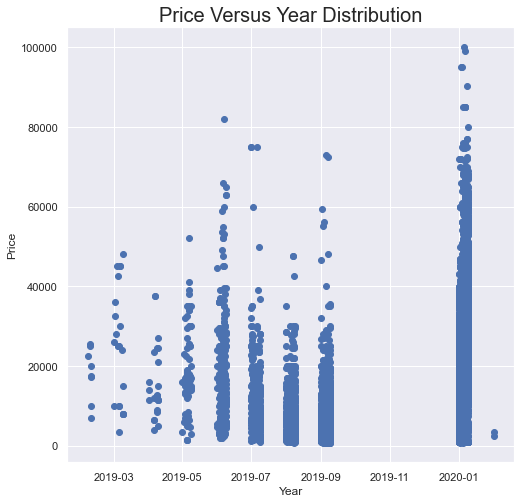

In [62]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(df2['year'],df2.price, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Versus Year Distribution', size = 20)
plt.show()

In [137]:
df2.year.min()

Timestamp('2019-02-06 00:00:00')

In [138]:
df2.year.max()

Timestamp('2020-02-01 00:00:00')

In [ ]:
# Used car dataset cover the used car sold of different model over a century.

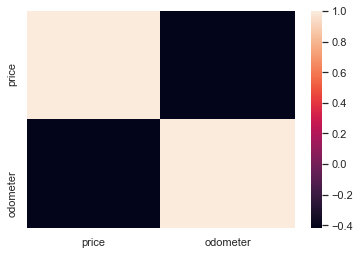

In [63]:

sn.heatmap(df2.corr())
plt.show()

In [143]:
corr = np.corrcoef(df2.odometer, df2.price)
corr

array([[ 1.        , -0.41881511],
       [-0.41881511,  1.        ]])

In [147]:
# Import regression modules
from sklearn.linear_model import LinearRegression
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [148]:
X = df2.drop('price', axis = 1)
lm = LinearRegression()

In [150]:
#lm.fit(X, df2['price'])

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>]], dtype=object)

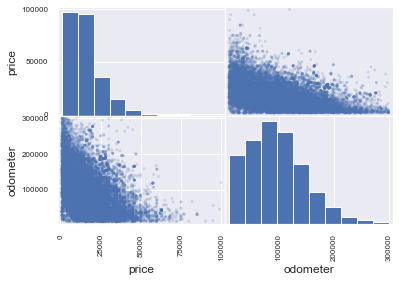

In [156]:
pd.plotting.scatter_matrix(df2, alpha = 0.2)

In [157]:
df2.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')